In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19

In [49]:
path = r"E:\1. Thesis\PDD_MangoLeaf\Dataset"

In [50]:
batch_size = 16
IMG_SHAPE = (128,128,3)
num_of_categories = 8

In [51]:
image_generator = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    validation_split=0.2)

In [52]:
train_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=path,
                                                   shuffle=True,
                                                   target_size=(128,128),
                                                   subset="training",
                                                   class_mode="categorical")

Found 3200 images belonging to 8 classes.


In [53]:
validation_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=path,
                                                   shuffle=True,
                                                   target_size=(128,128),
                                                   subset="validation",
                                                   class_mode="categorical")

Found 800 images belonging to 8 classes.


In [54]:
base_model = VGG19(input_shape=IMG_SHAPE,include_top=False,weights="imagenet")

In [8]:
base_model.trainable=False

In [9]:
inputs = tf.keras.Input(shape=(IMG_SHAPE))  # Define input
x = base_model(inputs, training=False)  # Pass input to base model
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_of_categories, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)  # Create model

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,557,896 (78.42 MB)

 Trainable params: 533,512 (2.04 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [11]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected 'optimizers'
    metrics=['accuracy']
)

In [12]:
training_history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
)

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5176 - loss: 1.3561

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.5184 - loss: 1.3540 - val_accuracy: 0.7962 - val_loss: 0.5850
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 584s 3s/step - accuracy: 0.8473 - loss: 0.4583 - val_accuracy: 0.7900 - val_loss: 0.5661
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.8720 - loss: 0.3547 - val_accuracy: 0.8537 - val_loss: 0.3888
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.9080 - loss: 0.2802 - val_accuracy: 0.7912 - val_loss: 0.5640
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9106 - loss: 0.2404 - val_accuracy: 0.8575 - val_loss: 0.4221
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9306 - loss: 0.2058 - val_accuracy: 0.8462 - val_loss: 0.4000
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.9388 - loss: 0.1883 - val_accuracy: 0.8687 - val_loss: 0.3501
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9251 - loss: 0.2067 - val_accuracy: 0.851

In [13]:
train_loss,train_acc = model.evaluate(train_dataset)
print('Training Accuracy:', train_acc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.9289 - loss: 0.2087
Training Accuracy: 0.9196875095367432


In [14]:
val_loss,val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8456 - loss: 0.4272
Validation Accuracy: 0.8399999737739563


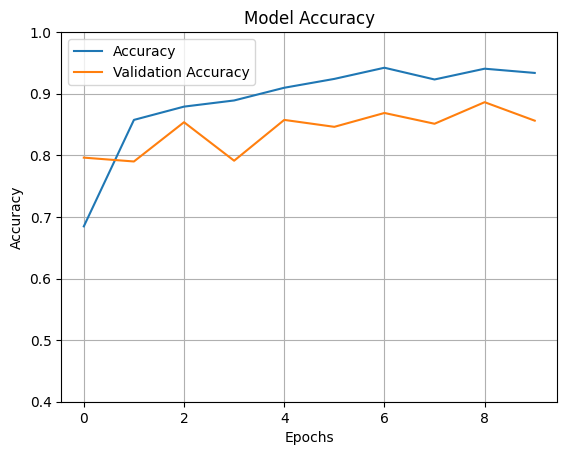

In [16]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

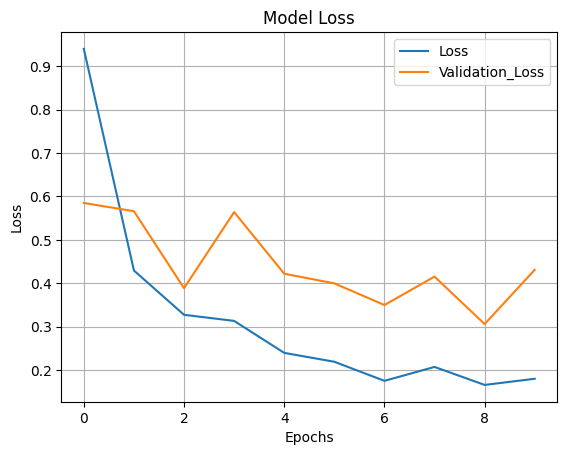

In [17]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Validation_Loss'])
plt.show()

In [18]:
model.name="MangoLeaf_vgg19"

In [19]:
model.save('VGG19_MangoLeaf.keras')

In [21]:
p=model.predict(validation_dataset)

50/50 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step


In [23]:
import numpy as np
pred_classes=np.argmax(p, axis=1)

In [24]:
pred_classes

array([6, 3, 0, 0, 6, 1, 1, 3, 7, 3, 4, 1, 2, 0, 2, 6, 0, 1, 2, 4, 4, 6,
       4, 4, 4, 7, 6, 0, 1, 0, 7, 2, 1, 0, 1, 0, 7, 1, 4, 3, 7, 3, 6, 2,
       2, 7, 0, 6, 1, 7, 4, 1, 7, 0, 0, 1, 6, 2, 1, 5, 0, 4, 7, 0, 6, 3,
       4, 7, 2, 2, 5, 0, 0, 4, 3, 0, 7, 6, 4, 7, 0, 6, 7, 6, 2, 7, 7, 2,
       3, 5, 4, 2, 6, 1, 7, 7, 3, 0, 3, 1, 0, 6, 6, 7, 1, 4, 7, 1, 5, 7,
       4, 6, 7, 4, 2, 1, 3, 3, 4, 2, 4, 4, 3, 2, 5, 0, 5, 4, 2, 3, 1, 6,
       4, 5, 5, 0, 5, 0, 4, 0, 7, 7, 7, 1, 5, 0, 7, 0, 7, 1, 3, 7, 6, 1,
       1, 2, 2, 1, 0, 7, 2, 3, 6, 6, 0, 3, 1, 1, 4, 3, 2, 3, 6, 0, 3, 4,
       2, 2, 1, 6, 3, 7, 7, 7, 7, 6, 0, 1, 6, 2, 0, 6, 7, 6, 0, 5, 7, 4,
       7, 4, 2, 2, 6, 6, 1, 1, 4, 0, 0, 2, 0, 1, 3, 6, 2, 4, 3, 1, 3, 7,
       3, 6, 2, 1, 2, 0, 2, 6, 6, 2, 7, 6, 1, 2, 1, 5, 4, 7, 4, 5, 4, 6,
       1, 6, 4, 3, 2, 2, 3, 6, 3, 0, 4, 4, 6, 4, 0, 5, 0, 4, 4, 7, 2, 4,
       7, 7, 7, 4, 6, 0, 3, 7, 7, 2, 2, 6, 1, 7, 0, 1, 5, 3, 2, 0, 1, 3,
       2, 2, 1, 1, 7, 4, 4, 7, 6, 4, 6, 2, 7, 3, 7,

In [25]:
true_classes=validation_dataset.classes

In [26]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [27]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
cm=confusion_matrix(true_classes,pred_classes)
cm

array([[18, 14, 12, 10, 13,  3, 13, 17],
       [13, 13, 11, 11, 13,  8, 13, 18],
       [10, 13, 18, 11, 16,  4, 15, 13],
       [16,  9, 16, 12, 13,  5,  8, 21],
       [ 6, 18, 10, 10, 15,  8, 11, 22],
       [12, 17,  9, 16,  9,  9, 12, 16],
       [10, 12, 14, 18, 12,  7,  7, 20],
       [17, 15,  9, 13,  6,  9, 17, 14]], dtype=int64)

In [30]:
cmn=cm/cm.astype(float).sum(axis=1)

In [35]:
class_names = validation_dataset.class_indices  # Returns a dictionary {class_name: index}
class_names = list(class_names.keys())  # Extract class names as a list
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [36]:
print(classification_report(true_classes,pred_classes, target_names = ['Anthracnose' ,'Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']))

                  precision    recall  f1-score   support

     Anthracnose       0.18      0.18      0.18       100
Bacterial Canker       0.12      0.13      0.12       100
  Cutting Weevil       0.18      0.18      0.18       100
        Die Back       0.12      0.12      0.12       100
      Gall Midge       0.15      0.15      0.15       100
         Healthy       0.17      0.09      0.12       100
  Powdery Mildew       0.07      0.07      0.07       100
     Sooty Mould       0.10      0.14      0.12       100

        accuracy                           0.13       800
       macro avg       0.14      0.13      0.13       800
    weighted avg       0.14      0.13      0.13       800



In [39]:
labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']

<Axes: >

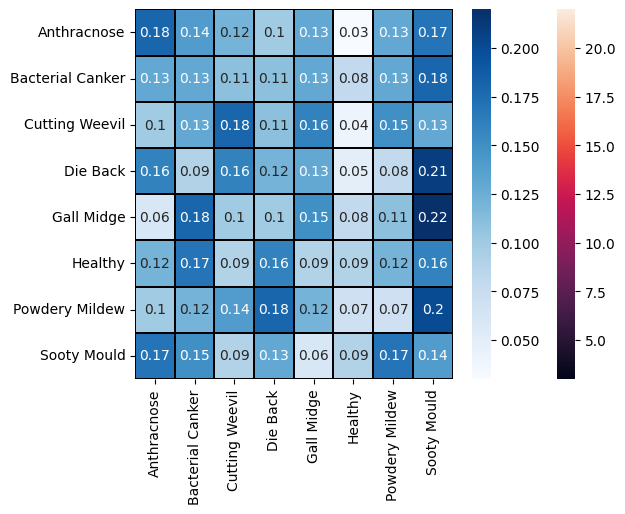

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm)
sns.heatmap(cmn,cmap="Blues",linecolor='black',linewidth=0.01,annot=True,xticklabels=labels,yticklabels=labels)